In [2]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [4]:
book = pd.read_csv("book.csv")

In [5]:
book.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [6]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [7]:
book.Florence.unique()

array([0, 1], dtype=int64)

In [ ]:
#Apriori Algorithm

In [39]:
apriori(book, min_support=0.1)

,support,itemsets
0,0.4230,(0)
1,0.2475,(1)
2,0.4310,(2)
3,0.2820,(3)
4,0.2145,(4)
5,0.2410,(5)
6,0.2760,(6)
7,0.1135,(7)
8,0.1085,(10)
9,0.1650,"(0, 1)"


In [ ]:
# Model 1 Support =0.01 and Confidence = .7

In [33]:
frequent=apriori(book,min_support=0.01, use_colnames = True)
frequent['length'] = frequent['itemsets'].apply(lambda x: len(x))
frequent

,support,itemsets,length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
...,...,...,...
589,0.0125,"(ArtBks, CookBks, ItalCook, RefBks, ItalAtlas,...",6
590,0.0145,"(DoItYBks, ArtBks, CookBks, RefBks, ChildBks, ...",7
591,0.0105,"(ArtBks, DoItYBks, CookBks, ItalCook, ItalArt,...",7
592,0.0100,"(ArtBks, CookBks, RefBks, ItalCook, ItalArt, C...",7


In [ ]:
#Rules and Confident Ratio

In [37]:
rules1=association_rules(frequent, metric="lift", min_threshold=0.7)
rules1['length_con'] = rules1['consequents'].apply(lambda x: len(x)) # added length of consequents
rules1['length_ant'] = rules1['antecedents'].apply(lambda x: len(x)) # added length of antecedents
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,length_con,length_ant
0,(ChildBks),(YouthBks),0.4230,0.2475,0.165,0.390071,1.576044,0.060308,1.233750,1,1
1,(YouthBks),(ChildBks),0.2475,0.4230,0.165,0.666667,1.576044,0.060308,1.731000,1,1
2,(ChildBks),(CookBks),0.4230,0.4310,0.256,0.605201,1.404179,0.073687,1.441240,1,1
3,(CookBks),(ChildBks),0.4310,0.4230,0.256,0.593968,1.404179,0.073687,1.421069,1,1
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.184,0.434988,1.542511,0.064714,1.270770,1,1
...,...,...,...,...,...,...,...,...,...,...,...
11101,(ItalCook),"(ArtBks, CookBks, RefBks, ItalAtlas, ItalArt, ...",0.1135,0.0115,0.011,0.096916,8.427504,0.009695,1.094583,6,1
11102,(RefBks),"(ArtBks, CookBks, ItalCook, ItalAtlas, ItalArt...",0.2145,0.0110,0.011,0.051282,4.662005,0.008640,1.042459,6,1
11103,(ItalAtlas),"(ArtBks, CookBks, RefBks, ItalCook, ItalArt, C...",0.0370,0.0145,0.011,0.297297,20.503262,0.010463,1.402442,6,1
11104,(ItalArt),"(ArtBks, CookBks, RefBks, ItalCook, ItalAtlas,...",0.0485,0.0115,0.011,0.226804,19.722098,0.010442,1.278460,6,1


In [36]:
rules1.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,length_con,length_ant
1377,"(ItalArt, CookBks, RefBks)","(ArtBks, ItalCook, ItalAtlas)",0.0165,0.0130,0.0125,0.757576,58.275058,0.012286,4.071375,3,3
1375,"(ArtBks, ItalCook, ItalAtlas)","(ItalArt, CookBks, RefBks)",0.0130,0.0165,0.0125,0.961538,58.275058,0.012286,25.571000,3,3
1442,"(ChildBks, ArtBks, ItalCook, ItalAtlas)","(ItalArt, CookBks, RefBks)",0.0115,0.0165,0.0110,0.956522,57.971014,0.010810,22.620500,3,4
1454,"(ArtBks, ItalCook, ItalAtlas)","(ItalArt, ChildBks, CookBks, RefBks)",0.0130,0.0150,0.0110,0.846154,56.410256,0.010805,6.402500,4,3
1447,"(ItalArt, ChildBks, CookBks, RefBks)","(ArtBks, ItalCook, ItalAtlas)",0.0150,0.0130,0.0110,0.733333,56.410256,0.010805,3.701250,3,4
1379,"(ItalArt, RefBks, ItalCook)","(ArtBks, CookBks, ItalAtlas)",0.0160,0.0140,0.0125,0.781250,55.803571,0.012276,4.507429,3,3
1374,"(ArtBks, CookBks, ItalAtlas)","(ItalArt, RefBks, ItalCook)",0.0140,0.0160,0.0125,0.892857,55.803571,0.012276,9.184000,3,3
1439,"(ChildBks, ArtBks, CookBks, ItalAtlas)","(ItalArt, RefBks, ItalCook)",0.0125,0.0160,0.0110,0.880000,55.000000,0.010800,8.200000,3,4
1453,"(ArtBks, CookBks, ItalAtlas)","(ItalArt, ChildBks, RefBks, ItalCook)",0.0140,0.0145,0.0110,0.785714,54.187192,0.010797,4.599000,4,3
1450,"(ItalArt, ChildBks, RefBks, ItalCook)","(ArtBks, CookBks, ItalAtlas)",0.0145,0.0140,0.0110,0.758621,54.187192,0.010797,4.084857,3,4


In [40]:
# Highest Lift Ratio is 58.275 -Persons who buy  ItalArt, CookBks, RefBks will also buy ArtBks, ItalCook, ItalAtlas
# Highest Lift Ratio is 58.275 -Persons Who buy ArtBks, ItalCook, ItalAtlas  will also buy ItalArt, CookBks, RefBks

In [ ]:
# Model 2 Support =0.05 and Confidence = .7

In [41]:
frequent_itemsets2=apriori(book,min_support=0.05, use_colnames = True)
frequent_itemsets2['length'] = frequent_itemsets2['itemsets'].apply(lambda x: len(x))
frequent_itemsets2

,support,itemsets,length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
...,...,...,...
95,0.0600,"(GeogBks, DoItYBks, CookBks, YouthBks)",4
96,0.0560,"(GeogBks, ArtBks, CookBks, YouthBks)",4
97,0.0650,"(ArtBks, DoItYBks, CookBks, GeogBks)",4
98,0.0510,"(DoItYBks, CookBks, ChildBks, YouthBks, GeogBks)",5


In [45]:
rules2=association_rules(frequent_itemsets2, metric="lift", min_threshold=0.7)
rules2['length_con'] = rules2['consequents'].apply(lambda x: len(x)) # added length of consequents
rules2['length_ant'] = rules2['antecedents'].apply(lambda x: len(x)) # added length of antecedents
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,length_con,length_ant
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,1,1
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,1,1
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,1,1
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,1,1
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770,1,1
...,...,...,...,...,...,...,...,...,...,...,...
657,(ArtBks),"(ChildBks, DoItYBks, CookBks, GeogBks)",0.2410,0.0890,0.0535,0.221992,2.494289,0.032051,1.170939,4,1
658,(DoItYBks),"(ChildBks, ArtBks, CookBks, GeogBks)",0.2820,0.0835,0.0535,0.189716,2.272052,0.029953,1.131085,4,1
659,(CookBks),"(ChildBks, ArtBks, GeogBks, DoItYBks)",0.4310,0.0595,0.0535,0.124130,2.086217,0.027856,1.073789,4,1
660,(ChildBks),"(ArtBks, CookBks, GeogBks, DoItYBks)",0.4230,0.0650,0.0535,0.126478,1.945808,0.026005,1.070379,4,1


In [46]:
rules2.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,length_con,length_ant
182,"(CookBks, YouthBks)",(ItalCook),0.1620,0.1135,0.0590,0.364198,3.208789,0.040613,1.394301,1,2
183,(ItalCook),"(CookBks, YouthBks)",0.1135,0.1620,0.0590,0.519824,3.208789,0.040613,1.745193,2,1
513,"(CookBks, GeogBks)","(ChildBks, ItalCook)",0.1925,0.0850,0.0525,0.272727,3.208556,0.036137,1.258125,2,2
508,"(ChildBks, ItalCook)","(CookBks, GeogBks)",0.0850,0.1925,0.0525,0.617647,3.208556,0.036137,2.111923,2,2
511,"(ChildBks, CookBks)","(GeogBks, ItalCook)",0.2560,0.0640,0.0525,0.205078,3.204346,0.036116,1.177474,2,2
510,"(GeogBks, ItalCook)","(ChildBks, CookBks)",0.0640,0.2560,0.0525,0.820312,3.204346,0.036116,4.140522,2,2
640,"(ChildBks, ArtBks, CookBks)","(DoItYBks, GeogBks)",0.1265,0.1325,0.0535,0.422925,3.191886,0.036739,1.503271,2,3
653,"(DoItYBks, GeogBks)","(ChildBks, ArtBks, CookBks)",0.1325,0.1265,0.0535,0.403774,3.191886,0.036739,1.465047,3,2
514,(ItalCook),"(ChildBks, CookBks, GeogBks)",0.1135,0.1495,0.0525,0.462555,3.094014,0.035532,1.582488,3,1
507,"(ChildBks, CookBks, GeogBks)",(ItalCook),0.1495,0.1135,0.0525,0.351171,3.094014,0.035532,1.366307,1,3


In [ ]:
#Model 2 output
# Highest Lift Ratio is 3.2087 -Persons who buy  CookBks, YouthBks will also buy  ItalCook
# Highest Lift Ratio is 3.2087 -Persons Who buy ItalCook  will also buy CookBks, YouthBks

In [ ]:
# Model 3 Support =0.02 and Confidence = .7

In [47]:
frequent_itemsets3=apriori(book,min_support=0.02, use_colnames = True)
frequent_itemsets3['length'] = frequent_itemsets3['itemsets'].apply(lambda x: len(x))
frequent_itemsets3

,support,itemsets,length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
...,...,...,...
271,0.0210,"(DoItYBks, ArtBks, CookBks, RefBks, ChildBks, ...",6
272,0.0270,"(DoItYBks, CookBks, RefBks, ChildBks, YouthBks...",6
273,0.0310,"(ArtBks, DoItYBks, CookBks, ChildBks, YouthBks...",6
274,0.0225,"(ArtBks, CookBks, RefBks, ChildBks, YouthBks, ...",6


In [48]:
rules3=association_rules(frequent_itemsets3, metric="lift", min_threshold=0.7)
rules3['length_con'] = rules3['consequents'].apply(lambda x: len(x)) # added length of consequents
rules3['length_ant'] = rules3['antecedents'].apply(lambda x: len(x)) # added length of antecedents
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,length_con,length_ant
0,(ChildBks),(YouthBks),0.4230,0.2475,0.165,0.390071,1.576044,0.060308,1.233750,1,1
1,(YouthBks),(ChildBks),0.2475,0.4230,0.165,0.666667,1.576044,0.060308,1.731000,1,1
2,(ChildBks),(CookBks),0.4230,0.4310,0.256,0.605201,1.404179,0.073687,1.441240,1,1
3,(CookBks),(ChildBks),0.4310,0.4230,0.256,0.593968,1.404179,0.073687,1.421069,1,1
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.184,0.434988,1.542511,0.064714,1.270770,1,1
...,...,...,...,...,...,...,...,...,...,...,...
3225,(DoItYBks),"(ArtBks, CookBks, RefBks, ChildBks, GeogBks)",0.2820,0.0405,0.024,0.085106,2.101392,0.012579,1.048756,5,1
3226,(CookBks),"(ArtBks, DoItYBks, RefBks, ChildBks, GeogBks)",0.4310,0.0275,0.024,0.055684,2.024889,0.012148,1.029846,5,1
3227,(RefBks),"(ArtBks, DoItYBks, CookBks, ChildBks, GeogBks)",0.2145,0.0535,0.024,0.111888,2.091367,0.012524,1.065744,5,1
3228,(ChildBks),"(ArtBks, DoItYBks, CookBks, RefBks, GeogBks)",0.4230,0.0275,0.024,0.056738,2.063185,0.012368,1.030996,5,1


In [49]:
rules3.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,length_con,length_ant
2549,"(RefBks, ItalCook)","(ChildBks, CookBks, ItalAtlas)",0.0465,0.0225,0.0200,0.430108,19.115890,0.018954,1.715236,3,2
2540,"(ChildBks, CookBks, ItalAtlas)","(RefBks, ItalCook)",0.0225,0.0465,0.0200,0.888889,19.115890,0.018954,8.581500,2,3
1675,"(RefBks, ItalCook)","(CookBks, ItalAtlas)",0.0465,0.0285,0.0230,0.494624,17.355216,0.021675,1.922330,2,2
1678,"(CookBks, ItalAtlas)","(RefBks, ItalCook)",0.0285,0.0465,0.0230,0.807018,17.355216,0.021675,4.940864,2,2
2906,"(ArtBks, ItalCook)","(ItalArt, CookBks, GeogBks)",0.0565,0.0250,0.0240,0.424779,16.991150,0.022587,1.695000,3,2
2903,"(ItalArt, CookBks, GeogBks)","(ArtBks, ItalCook)",0.0250,0.0565,0.0240,0.960000,16.991150,0.022587,23.587500,2,3
2542,"(ChildBks, RefBks, ItalCook)","(CookBks, ItalAtlas)",0.0415,0.0285,0.0200,0.481928,16.909744,0.018817,1.875221,2,3
2547,"(CookBks, ItalAtlas)","(ChildBks, RefBks, ItalCook)",0.0285,0.0415,0.0200,0.701754,16.909744,0.018817,3.213794,3,2
2606,"(ArtBks, ItalCook)","(ItalArt, ChildBks, CookBks)",0.0565,0.0300,0.0285,0.504425,16.814159,0.026805,1.957321,3,2
2603,"(ItalArt, ChildBks, CookBks)","(ArtBks, ItalCook)",0.0300,0.0565,0.0285,0.950000,16.814159,0.026805,18.870000,2,3


In [ ]:
#Model 3 output
# Highest Lift Ratio is 19.1158 -Persons who buy  RefBks, ItalCook will also buy  ChildBks, CookBks, ItalAtlas
# Highest Lift Ratio is 19.1158 -Persons Who buy ChildBks, CookBks, ItalAtlas  will also buy RefBks, ItalCook

In [ ]:
#Support Vs Confidence

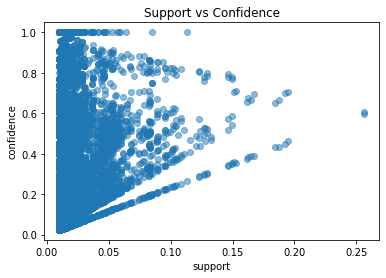

In [64]:
import matplotlib.pyplot as plt
plt.scatter(rules1['support'], rules1['confidence'], alpha=0.5)
#plt.scatter(rules3['support'], rules3['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

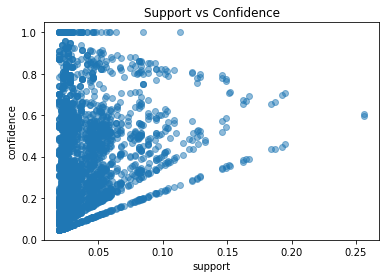

In [63]:
import matplotlib.pyplot as plt
#plt.scatter(rules1['support'], rules1['confidence'], alpha=0.5)
plt.scatter(rules3['support'], rules3['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

In [ ]:
#Support vs Lift

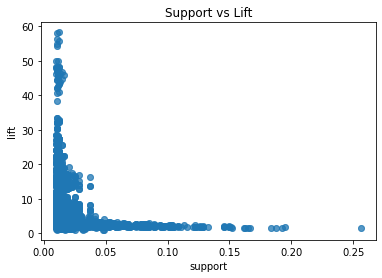

In [66]:
plt.scatter(rules1['support'], rules1['lift'], alpha=0.5)
#plt.scatter(rules2['support'], rules2['lift'], alpha=0.5)
#plt.scatter(rules3['support'], rules3['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

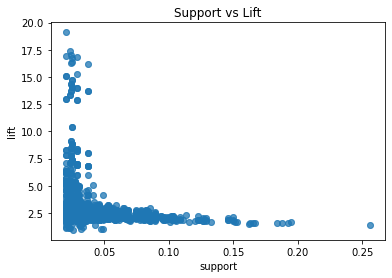

In [65]:
#plt.scatter(rules1['support'], rules1['lift'], alpha=0.5)
#plt.scatter(rules2['support'], rules2['lift'], alpha=0.5)
plt.scatter(rules3['support'], rules3['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

In [ ]:
#Lift Vs confidence

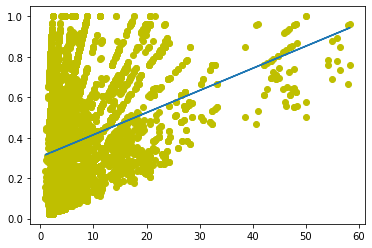

In [52]:
import numpy as np
fit = np.polyfit(rules1['lift'], rules1['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules1['lift'], rules1['confidence'], 'yo', rules1['lift'], 
 fit_fn(rules1['lift']))

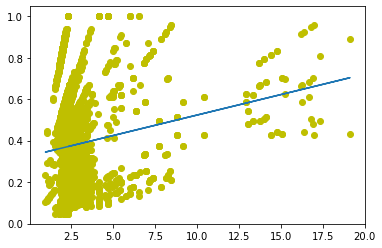

In [62]:
import numpy as np
fit = np.polyfit(rules3['lift'], rules3['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules3['lift'], rules3['confidence'], 'yo', rules3['lift'], 
 fit_fn(rules3['lift']))